# ORIE 4580/5580/5581 Assignment 2

#### Students: Patric Huang (jh3223), kahei Lam(kl2235)
#### GitHub Link: https://github.com/Althealam/ORIE-5580-Simulation-Modeling-Analysis/blob/main/HW2/ORIE%205570_hw2.ipynb

### Instructions


* Due Thursday September 11, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish).
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 4 and 6 of [Introduction to Probability](https://chance.dartmouth.edu/teaching_aids/books_articles/probability_book/book.html) by Grinstead and Snell. You can skip things that seem more advanced, like the Beta distribution in $Ch\, 4$ and the part on queueing in $Ch\,6$ - the part about paradoxes in probability is also strictly speaking not required$\ldots$(but I would never recommend *not* reading that!)

In [ ]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


---

---

## Question 1: Practice with expectation and variance (25 pts)



---


**(a)** Given a coin which comes up *Heads* with probability $p$, let $N_p$ denote the number of times the coin is tossed until the first *Heads*. Argue that $$N_p = \begin{cases} 1 & \text{with probability } p\\ 1+\tilde{N}_p & \text{with probability } 1-p \end{cases}$$
where $\tilde{N}_p$ is an independent random variable with the same distribution as $N_p$.
Using this, show that $\mathbb{E}[N_p] = 1/p$. Also use a similar argument to find $Var(N_p)$.

*Note: The rv $N_p$ is said to be a Geometric$(p)$ rv; it has pmf $p(k) = (1-p)^{k-1}p$.*



---



### Ans.

$\mathbb{E}[N_p] = p \cdot 1 + (1 - p)(1 + \mathbb{E}[N_p])$  
$\mathbb{E}[N_p] = 1 + (1 - p)\mathbb{E}[N_p]$  
$\Rightarrow \mathbb{E}[N_p](1 - (1 - p)) = 1$  
$\Rightarrow \mathbb{E}[N_p] = \frac{1}{p}$


$\mathbb{E}[N_p^2] = p \cdot 1^2 + (1 - p)\mathbb{E}[(1 + \tilde{N}_p)^2]$  
$= p + (1 - p)(1 + 2\mathbb{E}[N_p] + \mathbb{E}[N_p^2])$  
$= p + (1 - p)\left(1 + \frac{2}{p} + \mathbb{E}[N_p^2]\right)$

$
\mathbb{E}[N_p^2] = p + (1 - p) \cdot 1 + (1 - p) \cdot \frac{2}{p} + (1 - p)\mathbb{E}[N_p^2]
$

$
\mathbb{E}[N_p^2] = \left[p + (1 - p) + \frac{2(1 - p)}{p}\right] + (1 - p)\mathbb{E}[N_p^2]
$


$
\mathbb{E}[N_p^2] - (1 - p)\mathbb{E}[N_p^2] = p + (1 - p) + \frac{2(1 - p)}{p}
$

$
\mathbb{E}[N_p^2] \cdot p = p + (1 - p)\left(1 + \frac{2}{p}\right)
$

$\mathbb{E}[N_p^2] = \frac{p + (1 - p)\left(1 + \frac{2}{p}\right)}{p}$  
$= \frac{2 - p}{p^2}$


$\text{Var}(N_p) = \mathbb{E}[N_p^2] - (\mathbb{E}[N_p])^2$  
$= \frac{2 - p}{p^2} - \frac{1}{p^2} = \frac{1 - p}{p^2}$


### Final Results

- $\mathbb{E}[N_p] = \frac{1}{p}$
- $\text{Var}(N_p) = \frac{1 - p}{p^2}$

___

**(b)** In the previous assignment you estimated $\pi$ by sampling uniform random points $(X,Y)$ in $[-1,1]\times[-1,1]$, and checking if they fell within the circle. Suppose instead you sampled $n$ points uniformly in $[0,1]\times[0,1]$ and checked if $X^2+Y^2\leq 1$. Let $N_c$ be the number of points satisfying this; what is $\mathbb{E}[N_c]$ and $\text{Var}(N_c)$? Can you use this to get a better estimate of $\pi$ (i.e., with tighter confidence intervals given the same number of samples $n$)?

___

### Ans.


This is the area of a quarter-circle of radius 1 inside the unit square:

$p = \frac{\pi}{4}$

So $N_c \sim \text{Binomial}(n, \frac{\pi}{4})$


### Expectation

$\mathbb{E}[N_c] = n \cdot \frac{\pi}{4}$


### Variance

$\text{Var}(N_c) = n \cdot \frac{\pi}{4} \cdot \left(1 - \frac{\pi}{4}\right)$


### Estimator of $\pi$

Define the estimator:

$\hat{\pi} = 4 \cdot \frac{N_c}{n}$

Then:

$\mathbb{E}[\hat{\pi}] = \pi \quad$

$\text{Var}(\hat{\pi}) = 16 \cdot \frac{1}{n} \cdot \frac{\pi}{4} \left(1 - \frac{\pi}{4}\right)$

Standard error:

$\text{SE}(\hat{\pi}) = \frac{4}{\sqrt{n}} \cdot \sqrt{\frac{\pi}{4}\left(1 - \frac{\pi}{4}\right)}$


### Is this a better estimate?

Yes. Sampling from $[0, 1]^2$ concentrates points in the quarter-circle region, avoiding symmetry-based redundancy from $[-1, 1]^2$.

This gives lower variance per sample and tighter confidence intervals for the same $n$.

---
**(c)** The elevators in Rhodes Hall stop at $6$ floors. Suppose one morning you get in on the ground floor with $3$ other people, and each one of you wants to go to a floor in $\{2,3,4,5,6\}$ chosen uniformly at random, and independently of the others' choices. At how many floors will the elevator stop on average?


---

### Ans.

Let $I_k$ be the indicator for whether floor $k$ (for $k = 2,3,4,5,6$) is selected by at least one person.

Then:

$\mathbb{E}[S] = \sum_{k=2}^6 \mathbb{E}[I_k]$

Each $\mathbb{E}[I_k] = \mathbb{P}(\text{at least one person chooses floor } k)$

Each person picks uniformly from 5 floors, so the probability a person does not pick floor $k$ is:

$\mathbb{P}(\text{person does not pick } k) = \frac{4}{5}$

Since choices are independent, the probability no one picks floor $k$ is:

$\left(\frac{4}{5}\right)^4 = \frac{256}{625}$

$\mathbb{P}(\text{at least one picks } k) = 1 - \frac{256}{625} = \frac{369}{625}$

There are 5 possible floors, so:

$\mathbb{E}[S] = 5 \cdot \frac{369}{625} = \frac{1845}{625} \approx 2.952$

### Final Answer

The elevator stops at **about 2.952 floors on average**.

---

(d) For your next simulation homework, you pair up with a student you have not met before. At some point, you get bored of the homework, and decide to count how many common friends you have at Cornell. Suppose the total number of students at Cornell is $22,000$, out of which you have $500$ friends, and your homework partner has $440$. Assuming that for both of you, your friends form independent and uniform random samplings of the total student population, what is the expected number of friends you both have in common?

---

### Ans.

For each of your $500$ friends, the probability that a given person is also in your partner’s friend list is:

$P(\text{a person is in partner's list}) = \frac{440}{22{,}000}$

So the expected number of shared friends is:

$\mathbb{E}[\text{overlap}] = 500 \cdot \frac{440}{22{,}000} = \frac{500 \cdot 440}{22{,}000} = 10$


___
___

## Question 2: Pooled Testing (30 pts) ##


In 2020 Fall, Cornell adopted pooled testing to test a large population with a limited number of Covid tests. In pooled testing a sample is taken from each person and split into two subsamples. The first subsample from each person is pooled with those of $n-1$ other people into a single pooled sample of size $n$ people. (Cornell eventually used $n=5$.) If the pooled test comes back negative, then we declare all $n$ people in the pool to be
negative. If the pooled test comes back positive, we then individually test the second subsample from every person in the pool. In this question we'll explore the effects of different pool sizes $n$.

---

**(a)** The *prevalence* $p$ at the time of testing is defined to be the true fraction of people with Covid in the population. Now let $N$ be the number of (true) Covid-positive people in a pool of size $n$. What would you use as a model for the distribution of $N$, if you knew the $n$ people in the pool $(i)$ had never met each other in the last week, and $(ii)$ all lived in the same house. In each case, what is the mean and variance of $N$?

---

### Ans.
(i): if people never met each other in the last week, we can assume infection is independent of each other. So, we model $N$ using the Binomial distribution:

$$
N \sim \text{Binomial}(n, p)
$$

Mean:
$\mathbb{E}[N] = np$

Variance:
$\text{Var}(N) = np(1 - p)$

(ii): If people live together, they are more likely to infect each other, so their infection statuses are not independent. A reasonable model might be a Beta-Binomial.

Mean: still $\mathbb{E}[N] = np$
(since $p$ is still the average infection probability)

Variance:
$\text{Var}(N) > np(1 - p)$
(because of positive correlation — if one person is infected, others in the household are more likely to be as well)

___

**(b)** Suppose that the test has no *false positives* and no *false negatives*; it comes back positive if **anyone** in the pool is positive and comes back negative if all people in the pool are negative. Let $T$ be the number of tests you need to be *sure* of each persons status (i.e., if they are COVID positive or not). What is the distribution of $T$, and what is its mean and variance? Clearly state all assumptions you are making.

---

### Ans.

Assumptions:

- Each person is infected independently with probability p.

- The test has no false positives or false negatives.

- We’re only testing once (no retesting or repeated pools).


- If the pooled test is negative: $T = 1$
- If the pooled test is positive: $T = 1 + n$

The distribution of $T$ is:

$
T =
\begin{cases}
1 & \text{with probability } = (1 - p)^n \\
1 + n & \text{with probability } = 1 - (1 - p)^n
\end{cases}
$

---

### Expected Value of $T$

$
\mathbb{E}[T] = 1 \cdot (1 - p)^n + (1 + n) \cdot \left(1 - (1 - p)^n\right)
$

$
= (1 - p)^n + (1 + n)\left(1 - (1 - p)^n\right)
$

$
= (1 + n) - n(1 - p)^n
$

---

### Variance of $T$

First compute $\mathbb{E}[T^2]$:

$
\mathbb{E}[T^2] = 1^2 \cdot (1 - p)^n + (1 + n)^2 \cdot \left(1 - (1 - p)^n\right)
$

$
= (1 - p)^n + (1 + n)^2 \cdot \left(1 - (1 - p)^n\right)
$

Then:

$
\text{Var}(T) = \mathbb{E}[T^2] - \left[\mathbb{E}[T]\right]^2 = (1 - p)^n + (1 + n)^2 \cdot \left[1 - (1 - p)^n\right] - \left[(1 + n) - n(1 - p)^n\right]^2
$


___

**(c)** What is the pool size $n$ that minimizes the average number of tests per person when the prevalence is $0.0001$? What about when prevalence is $0.01$? You should do this numerically using plots (i.e., without calculus), as this is helps explain your recommendation to decision-makers (note though that you may want to test different ranges of $n$ for each setting).

---

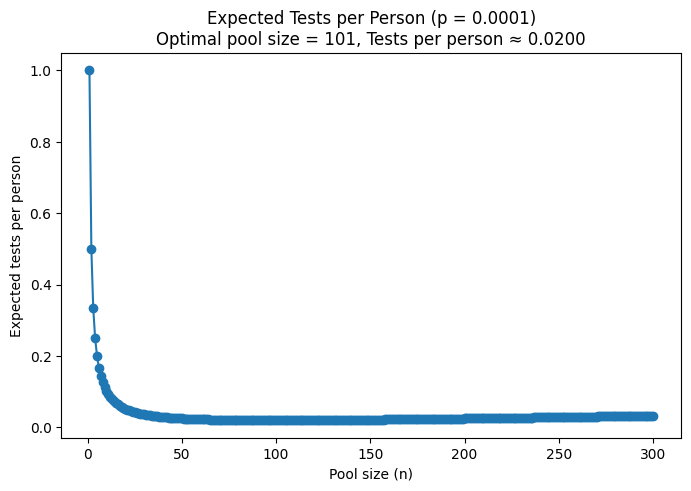

Prevalence = 0.0001: Optimal pool size = 101, Expected tests per person ≈ 0.0200


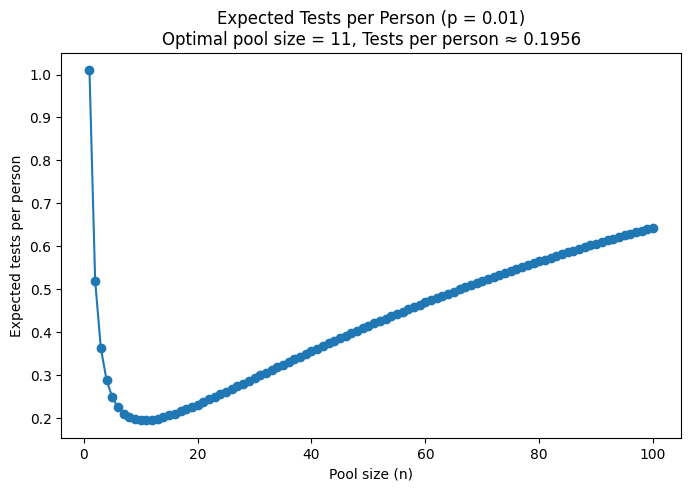

Prevalence = 0.01: Optimal pool size = 11, Expected tests per person ≈ 0.1956


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def expected_tests_per_person(n, p):
    n = np.array(n)
    return (1 + n * (1 - (1 - p)**n)) / n

def plot_optimal_pool_size(p, n_range, title):
    n_vals = np.arange(n_range[0], n_range[1] + 1)
    e_vals = expected_tests_per_person(n_vals, p)

    min_index = np.argmin(e_vals)
    best_n = n_vals[min_index]
    best_val = e_vals[min_index]

    plt.figure(figsize=(8, 5))
    plt.plot(n_vals, e_vals, marker='o')
    plt.title(f'{title}\nOptimal pool size = {best_n}, Tests per person ≈ {best_val:.4f}')
    plt.xlabel('Pool size (n)')
    plt.ylabel('Expected tests per person')
    plt.show()

    print(f"Prevalence = {p}: Optimal pool size = {best_n}, Expected tests per person ≈ {best_val:.4f}")

plot_optimal_pool_size(p=0.0001, n_range=(1, 300), title="Expected Tests per Person (p = 0.0001)")

plot_optimal_pool_size(p=0.01, n_range=(1, 100), title="Expected Tests per Person (p = 0.01)")

### Ans.

The optimal poolsize for prevalence 0.0001 is 101, which gives a expected tests per person of 0.02.

The optimal poolsize for prevalence 0.001 is 11, which gives a expected tests per person of 0.196.



---

*(d)* A more critical characteristic of pooled tests is the false negative rate, which is the probability that a test comes back negative when at least one person in the pool is Covid positive. False negatives are dangerous, because the person (or people) with Covid in the pool can infect others until Covid is otherwise detected or they become no longer infectious.

You know that false negatives must be more likely when there is a low viral load in a sample. To understand how to model false negatives in PCR tests, you consult with your friend who is a biologist, who tells you that the viral load $V$ in a PCR sample is measured using something called the cycle threshold (CT) score of a PCR test, which is equivalent to $C = -\log_2 V$. The viral load for a Covid-negative person is $V=0$. In a pooled sample of size $n$, each person contributes a fraction $1/n$ of the sample, and the resulting viral load has a total CT score of:
$$-\log_2 \left(\frac 1 n \sum_{i=1}^n 2^{-C_i}\right),$$
where $C_1, C_2, \ldots, C_n$ are the CT scores of each person in the pool. Finally, your friend recalls that probability of a false negative in a single PCR test is well modeled either as
$\frac{1}{1 + \exp(-10(C - 35))}$ or $\frac{1}{1 + \exp(10(C - 35))}$ (but he can not remember which one 🙁).

Can you figure out what the correct model is?

---



### Ans.

- The CT score is inversely related to viral load:
- PCR tests are more likely to miss (i.e., give false negatives) when the viral load is low, i.e., when $C$ is high.
- Therefore, the false negative probability should increase with CT score $C$.

Test at $C = 30$:
$\frac{1}{1 + \exp(-10(30 - 35))} = \frac{1}{1 + \exp(50)} \approx 0$

Test at $C = 40$:
$\frac{1}{1 + \exp(-10(40 - 35))} = \frac{1}{1 + \exp(-50)} \approx 1$

So:
- At high CT (low viral load) → false negative probability ≈ 1
- At low CT (high viral load) → false negative probability ≈ 0

First formula is correct.  

For the second formula:

Test at $C = 30$:
$\frac{1}{1 + \exp(10(30 - 35))} = \frac{1}{1 + \exp(-50)} \approx 1$

Test at $C = 40$:
$\frac{1}{1 + \exp(10(40 - 35))} = \frac{1}{1 + \exp(50)} \approx 0$

False negative probability decrease when C increase, which is not correct.

therefore $\frac{1}{1 + \exp(-10(C - 35))}$ is correct.



---


*(e)* You consult the epidemiology literature and find that the viral load for a Covid-positive person has been found from data to have a CT score $C$ that is well modeled via a *mixture of Gaussian* distribution as follows: with probability $0.40$, $C$ is $\mathcal{N}(20, 3.5^2)$ (i.e., normally distributed with mean 20 and variance $3.5^2$); with probability $0.5$, $C$ is $\mathcal{N}(30, 3^2)$, and otherwise,  $C$ is $\mathcal{N}(34.78, 1.32^2)$.

Use this data with the above model to estimate the probability of a false negative in a pooled test of size $n$ containing a single Covid-positive person as a function of $n$. You'll need to generate, say, $m$ replications of the pooled test at each value of $n$, where you should choose $m$ to ensure that your results are meaningful. Report your results as a graph with the false negative rate on the $y$-axis and the pool size $n$ ranging from 1 to 50 on the $x$-axis. Select your simulation runlength so that your estimates would be useful in practice (for example, estimates that are $\pm$ 0.02 or so are sufficiently accurate).


---


### Ans.



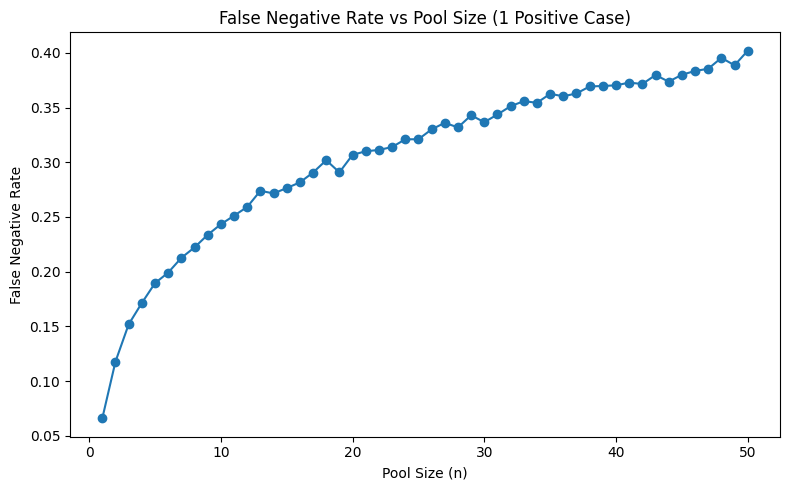

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mixture_probs = [0.4, 0.5, 0.1]
mixture_means = [20, 30, 34.78]
mixture_stds = [3.5, 3.0, 1.32]

def sample_ct_score(size):
    components = np.random.choice(3, size=size, p=mixture_probs)
    ct_scores = np.zeros(size)
    for i in range(3):
        idx = components == i
        ct_scores[idx] = np.random.normal(loc=mixture_means[i], scale=mixture_stds[i], size=np.sum(idx))
    return ct_scores

def false_negative_probability(c):
    return 1 / (1 + np.exp(-10 * (c - 35)))

n_vals = np.arange(1, 51)   # pool sizes from 1 to 50
m = 10000                  # simulation replications per pool size

fnr_results = []

for n in n_vals:
    ct_pos = sample_ct_score(m)
    ct_pooled = ct_pos + np.log2(n)
    fn_probs = false_negative_probability(ct_pooled)
    avg_fnr = np.mean(fn_probs)
    fnr_results.append(avg_fnr)

plt.figure(figsize=(8, 5))
plt.plot(n_vals, fnr_results, marker='o')
plt.xlabel('Pool Size (n)')
plt.ylabel('False Negative Rate')
plt.title('False Negative Rate vs Pool Size (1 Positive Case)')
plt.tight_layout()
plt.show()

## Question 3: Buffon and his magic needle (20 points)

In the first class we saw Buffon's needle experiment in which we drop needles of length 1 on a floor of parallel lines that are equally spaced 1 unit apart. If we drop $n$ needles and $N_{cross}$ of them cross a line, then an estimate of $\pi$ is $\hat{\pi}_n = 2n/N_{cross}$. We will now study how this works in practice (feel free to use the code provided in class).


---

**(a)** For a range of values of $n$ between $10$ and $10,000$, perform $30$ replications of the Buffon needle experiment. For each value of $n$ you test, plot the average of the $30$ estimates $\hat{\pi}_n = 2n/N_{cross}$ and a 95\% confidence interval for the expected value of $\hat{\pi}_n$. You should only be making one plot, with $n$ on the $x$-axis, and estimates and CIs on the $y$-axis.



---



### Ans.

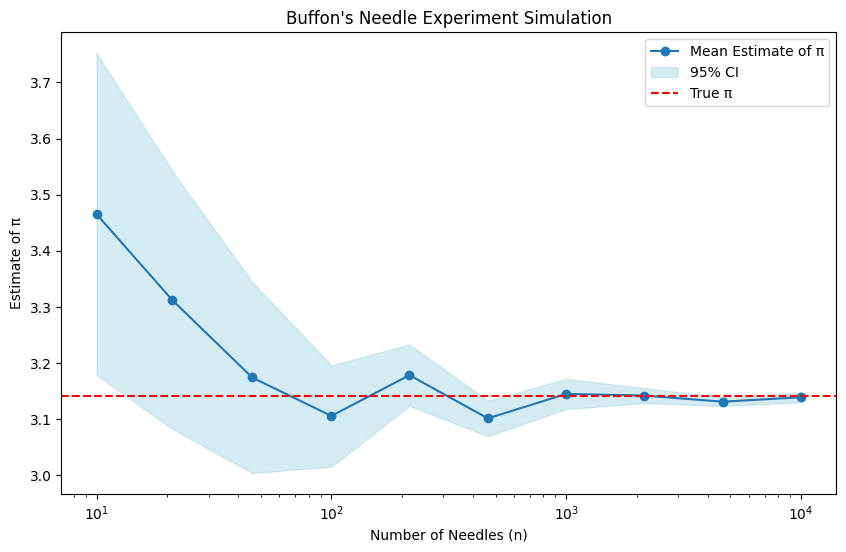

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def buffon_needles(n):
    d = np.random.rand(n) * 0.5  # distance for two equidistant parallel lines
    theta = np.random.rand(n) * (np.pi / 2)  # angle between the needle and the parallel line

    # intersection
    crosses = np.sum(d <= 0.5 * np.sin(theta))

    if crosses == 0:
        return np.nan
    return 2 * n / crosses # the prediction of pi

n_values = np.logspace(1, 4, 10, dtype=int)
replications = 30 # replication times

means = []
lower_bounds = []
upper_bounds = []

for n in n_values:
    # the prediction of pi
    estimates = [buffon_needles(n) for _ in range(replications)]
    # drop none values
    estimates = np.array([e for e in estimates if not np.isnan(e)])

    # get the mean and stf for the prediction of pi
    mean_est = np.mean(estimates)
    std_err = np.std(estimates, ddof=1) / np.sqrt(len(estimates))

    ci_lower = mean_est - 1.96 * std_err
    ci_upper = mean_est + 1.96 * std_err

    means.append(mean_est)
    lower_bounds.append(ci_lower)
    upper_bounds.append(ci_upper)

plt.figure(figsize=(10,6))
plt.plot(n_values, means, label="Mean Estimate of π", marker="o")
plt.fill_between(n_values, lower_bounds, upper_bounds, color="lightblue", alpha=0.5, label="95% CI")
plt.axhline(np.pi, color="red", linestyle="--", label="True π")
plt.xscale("log")
plt.xlabel("Number of Needles (n)")
plt.ylabel("Estimate of π")
plt.title("Buffon's Needle Experiment Simulation")
plt.legend()
plt.show()



---

**(b)** You may notice from your plot in part (a) that the estimator $\hat{\pi}_n$ has some *bias*, i.e., $\mathbb{E}[\hat{\pi}_n] \neq \pi$ (this may be more apparent for small values of $n$). Pick a small value (say, $n=100$), and do more replications (i.e., do multiple experiments, where in each experiment you throw $100$ needles), and determine if $\hat{\pi}_n$ is an overestimate or underestimate for $\pi$.


---


### Ans.

valid experiments: 10000 (excluded 0 cases with no intersections)
mean of estimates: 3.1553
median of estimates: 3.1250
true π value: 3.1416
bias (mean-true value): 0.0137
Conclusion: The estimator has a overestimate for π


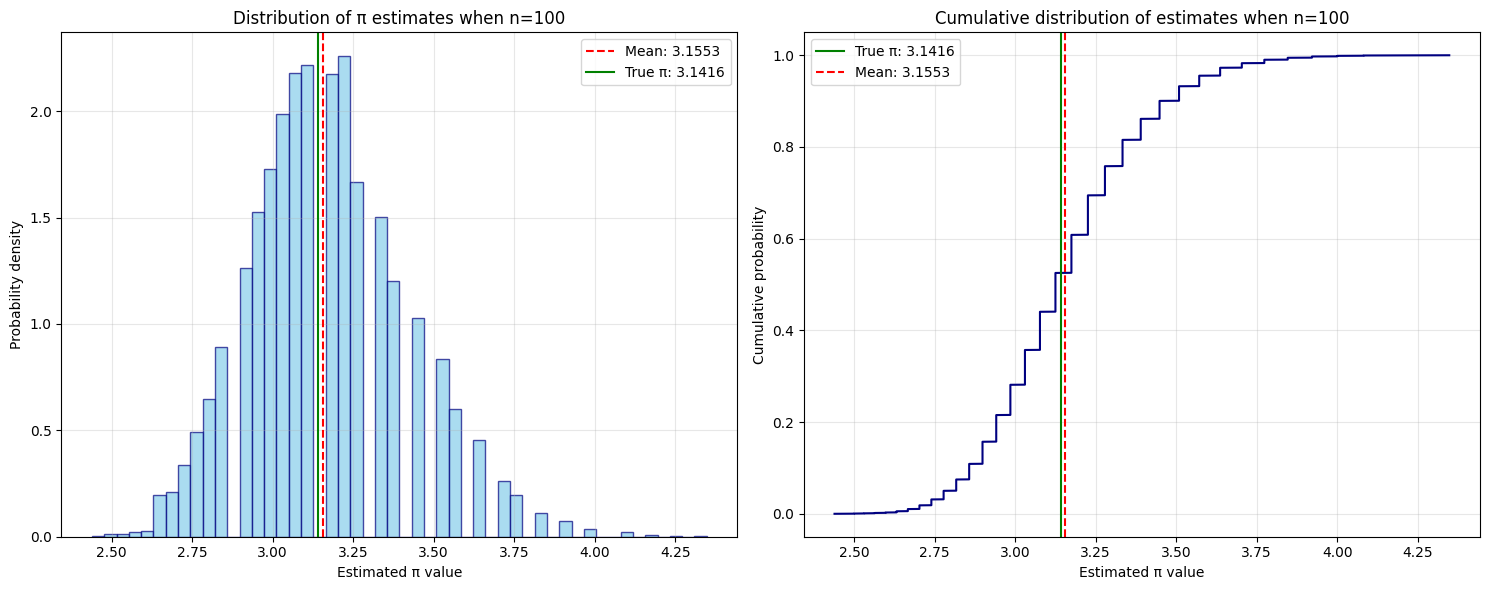

In [ ]:
n_small = 100
replications_large = 10000

estimates = [buffon_needles(n_small) for _ in range(replications_large)]
estimates = np.array([e for e in estimates if not np.isnan(e)])
valid_count = len(estimates)

mean_estimate = np.mean(estimates)
median_estimate = np.median(estimates)
true_pi = np.pi
bias = mean_estimate - true_pi

print(f"valid experiments: {valid_count} (excluded {replications_large-valid_count} cases with no intersections)")
print(f"mean of estimates: {mean_estimate:.4f}")
print(f"median of estimates: {median_estimate:.4f}")
print(f"true π value: {true_pi:.4f}")
print(f"bias (mean-true value): {bias:.4f}")

bias_type = "overestimate" if mean_estimate > true_pi else \
            "underestimate" if mean_estimate < true_pi else "no bias"
print(f"Conclusion: The estimator has a {bias_type} for π")

plt.figure(figsize=(15, 6))

# Subplot 1: Histogram showing distribution
plt.subplot(1, 2, 1)
plt.hist(estimates, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='navy')
plt.axvline(mean_estimate, color='red', linestyle='--', label=f'Mean: {mean_estimate:.4f}')
plt.axvline(true_pi, color='green', linestyle='-', label=f'True π: {true_pi:.4f}')
plt.title(f'Distribution of π estimates when n={n_small}')
plt.xlabel('Estimated π value')
plt.ylabel('Probability density')
plt.legend()
plt.grid(alpha=0.3)

# Subplot 2: CDF
plt.subplot(1, 2, 2)
sorted_estimates = np.sort(estimates)
cdf = np.arange(1, len(sorted_estimates) + 1) / len(sorted_estimates)
plt.plot(sorted_estimates, cdf, color='navy')
plt.axvline(true_pi, color='green', linestyle='-', label=f'True π: {true_pi:.4f}')
plt.axvline(mean_estimate, color='red', linestyle='--', label=f'Mean: {mean_estimate:.4f}')
plt.title(f'Cumulative distribution of estimates when n={n_small}')
plt.xlabel('Estimated π value')
plt.ylabel('Cumulative probability')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


**(c)** Can you mathematically justify your observation from part (b)?

### Ans.

1. **Distribution and Expectation of $N_{cross}$** <br>
$N_{cross}$ follow Binomial distribution $Binomial(n, p)$, so we can know that:<br>
$$E[N_{cross}]=np=\frac{2n}{\pi}$$
$$var(N_{cross})=np(1-p)$$

2. **Convexity of the Function**<br>
Define the function $f(x)=\frac{1}{x}$ (for $x>0$). Its second derivative shows $f''(x)=\frac{2}{x^3}>0 (x>0) $<br>
Thus, $f(x)=\frac{1}{x}$ is a strictly convex function.<br>

3. **Derivation Using Jensen's Inequality**<br>
For a strictly convex function $f(x)$ and a non-constant random varibale $x$, we can know that $E[f(x)]>f(E[x])$, so we can conclude that:<br>
$$E(\pi_n)=2n·E(f(N_{cross})>=2n·\frac{\pi}{2n}=\pi$$

**(d)** Note however that you can still use Buffon's experiment to get an estimate with $95$\% confidence intervals for $\mathbb{E}[\frac{N_{\text{cross}}}{n}]$. Using this, can you get a $95$\% confidence interval for $\pi$? (Note: this need not be symmetric about $\pi$).

### Ans.

Assume that the 95% confidence interval for $E[\frac{N_{cross}}{n}]$ is $(P_L, P_U)$<br>
Using the Law of Large Numbers, we can know that $\frac{N_{cross}}{n} \approx p = \frac{2}{\pi}$

$p=\frac{2}{\pi}$ => $\pi=\frac{2}{p}$<br>
Thus, the 95% confidence interval for $E[\pi]=E[\frac{2}{p}]$  is  $(\frac{2}{P_U}, \frac{2}{P_L})$

**(e) (Optional for everyone!)** Try to convince yourself (by linearity of expectation), that

(i) If you randomly throw $n$ matches of length $\ell$ and let $N^{\ell}_{\text{cross}}$ be a count of how many times these cross the lines, then $\frac{\mathbb{E}[N^{\ell}_{\text{cross}}]}{\ell} = $ constant (in other words, the expected number of crossings is proportional to $\ell$). Note: if $\ell>1$, each match may cross multiple lines.

(ii) The above result remains true if you throw *any* line segment (with any shape) of length $\ell$. Using this, can you see an easy way to compute $\mathbb{E}[N^{1}_{\text{cross}}]$ (i.e., the probability of a match crossing a line in the original experiment)?

**Part (i)**
To show $\frac{\mathbb{E}[N_{\text{cross}}^\ell]}{\ell} = \text{constant}$ (i.e., $\mathbb{E}[N_{\text{cross}}^\ell] \propto \ell$):

1. Decompose a matchstick of length $\ell$ into $k$ tiny segments, each of length $\Delta\ell$ (so $\ell = k \cdot \Delta\ell$). Define the indicator random variable $X_i$ as:
   $$
   X_i = \begin{cases}
   1 & \text{if the } i\text{-th tiny segment crosses a line}, \\
   0 & \text{otherwise}.
   \end{cases}
   $$

2. By linearity of expectation, the total number of crossings $N_{\text{cross}}^\ell$ satisfies $N_{\text{cross}}^\ell = X_1 + X_2 + \dots + X_k$, so:
   $$
   \mathbb{E}[N_{\text{cross}}^\ell] = \mathbb{E}[X_1] + \mathbb{E}[X_2] + \dots + \mathbb{E}[X_k].
   $$

3. Let $p = \mathbb{E}[X_i]$ (a constant for all $i$), then:
   $$
   \mathbb{E}[N_{\text{cross}}^\ell] = k \cdot p.
   $$

4. Substitute $k = \frac{\ell}{\Delta\ell}$:
   $$
   \mathbb{E}[N_{\text{cross}}^\ell] = \left( \frac{\ell}{\Delta\ell} \right) \cdot p = \ell \cdot \left( \frac{p}{\Delta\ell} \right),
   $$
   which implies $\frac{\mathbb{E}[N_{\text{cross}}^\ell]}{\ell} = \frac{p}{\Delta\ell} = \text{constant}$.


**Part (ii)**
To compute $\mathbb{E}[N_{\text{cross}}^1]$:

1. From Part (i), for any segment of length $\ell$: $\mathbb{E}[N_{\text{cross}}^\ell] = c \cdot \ell$ (constant $c$).

2. Consider a circle of diameter $1$ (length $\ell = \pi$), which intersects parallel lines exactly 2 times:
   $$
   \mathbb{E}[N_{\text{cross}}^\pi] = 2.
   $$

3. Solve for $c$:
   $$
   2 = c \cdot \pi \implies c = \frac{2}{\pi}.
   $$

4. For $\ell = 1$:
   $$
   \mathbb{E}[N_{\text{cross}}^1] = c \cdot 1 = \frac{2}{\pi}.
   $$


**Final Result**
- (i) $\frac{\mathbb{E}[N_{\text{cross}}^\ell]}{\ell} = \text{constant}$
- (ii) ${\frac{2}{\pi}}$

## Question 4: Overbooking (25 points)

A website called Tixmaster is in charge of selling tickets for an upcoming Taylor Swift concert in Ithaca. The concert will take place in the State Theater, which has an official capacity of $1500$ seats. You believe however that Tixmaster has sold $1600$ tickets (representatives of the company, when contacted, denied this$\ldots$).

The show starts at 7pm, and if a ticket holder hasn't shown up by that time, then they are not allowed to enter anymore so as to not disturb the other attendees. From experience, you believe that there is a 95\% chance that someone who has bought a ticket actually shows up by 7pm. and that people show up (or not) independently from one another.



---

**(a)** You wait inside the State Theater and count the number of people entering. What is the probability that you will be able to prove that Tixmaster is overbooking? (You can do this with or without simulation)


---

### Ans.

1. **Define Random Varibale and Distribution**<br>
Let $x$ denote the number of attendees amount 1600 ticket holders. Since each ticket holder attends independenly with probability $p$, $X$ follows a binomial distribution: $X ~ Binomial(n, p)$ where $n$=1600 and $p$=0.95

2. **Mean and Variance of the Binomial Distribution**<br>
$\mu=E[x]=np$=1600*0.95=1520<br>
$\sigma^2=var(x)=np(1-p)$=1600*0.95*0.05=76<br>

3. **Normal Approximation with Continuity Correction**<br>
For large n(here, n=1600), the binomial distribution can be approximated by a normal distribution<br>
Since X(binomial) is discrete(takes integer values) and the normal distribution is continuous, we apply a continuity correction:<br>
The discret event $X>1500$ (equivalent to $X \geq 1501$) corresponds to the continuous interval $X' \geq 1500.5$

4. **Standardization and Probability Calculation**
Convert the corrected boundary 1500.5 to a Z-score (standard normal varibale), so $Z=\frac{x-\mu}{\sigma}$=-2.237<br>
Using the symmetry of the Standard normal distribution,
\begin{align*}
P(X > 1500) &\approx P(Z \geq -2.237) \\
&= 1 - P(Z < -2.237) \\
&= \Phi(2.24) \approx 0.9875
\end{align*}

**Conclusion: The probability of proving overbooking is 98.75%**

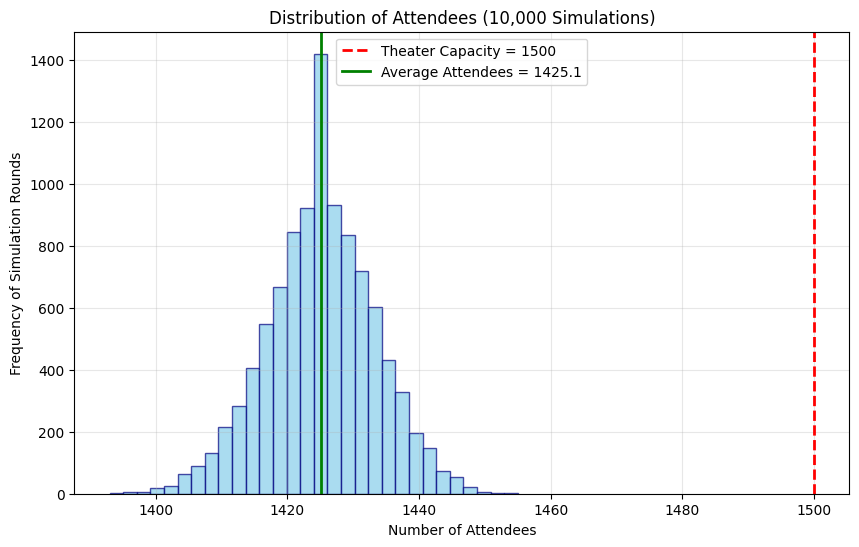

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n_tickets = 1500          # Total tickets sold (claimed overbooking)
attend_prob = 0.95        # Probability a single ticket holder attends
theater_cap = 1500        # Theater's maximum capacity
n_simulations = 10000     # Number of simulation rounds

# Generate attendance counts for all simulation rounds (binomial distribution)
attend_counts = np.random.binomial(n_tickets, attend_prob, n_simulations)

# Count how many rounds have attendees > theater capacity (proving overbooking)
overbooked_cases = np.sum(attend_counts > theater_cap)

# Calculate the simulated probability
simulated_prob = overbooked_cases / n_simulations


plt.figure(figsize=(10, 6))
plt.hist(attend_counts, bins=30, alpha=0.7, color='skyblue', edgecolor='navy')
plt.axvline(theater_cap, color='red', linestyle='--', linewidth=2, label=f'Theater Capacity = {theater_cap}')
plt.axvline(np.mean(attend_counts), color='green', linestyle='-', linewidth=2, label=f'Average Attendees = {np.mean(attend_counts):.1f}')
plt.title('Distribution of Attendees (10,000 Simulations)')
plt.xlabel('Number of Attendees')
plt.ylabel('Frequency of Simulation Rounds')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

**(b)** You manage to catch Tixmaster overbooking this time, and to prevent it in future, you decide to impose a fine to try and disincentivize overbooking. You know Tixmaster earns 100 in profit for every ticket sold (whether the holder shows up or not). You again have an agent counting how many people show up to the concert by $7$pm (you can not see how many are late or no-shows), and can charge Tixmaster a fine of 500 for each person exceeding the capacity.

Use a simulation to estimate how many extra tickets (over 1500) Tixmaster will sell, if they are trying to maximize their expected profit (after paying any fines).

### Ans.

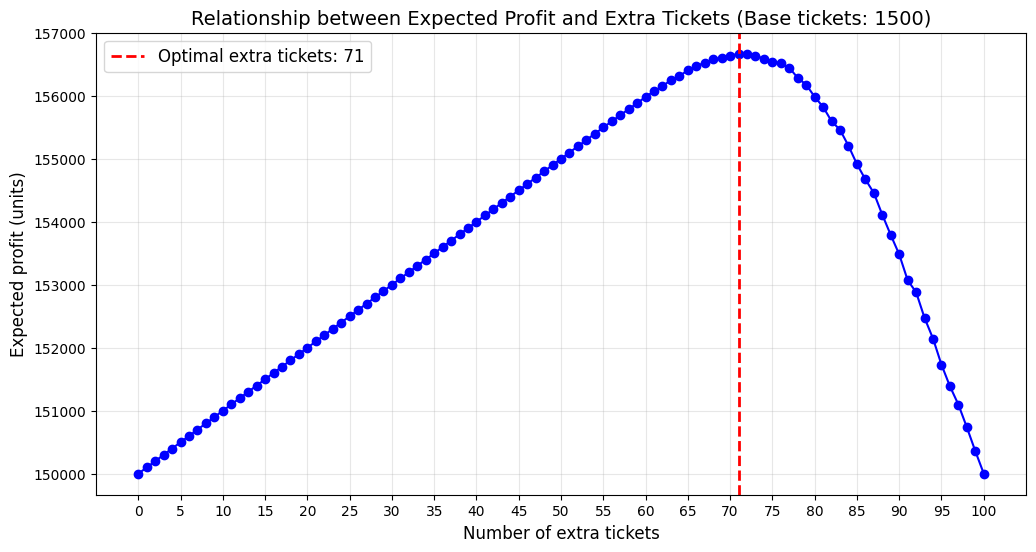

Number of extra tickets to maximize expected profit: 71
Maximum expected profit at this level: 156668.20 units


In [ ]:
base_tickets = 1500          # Base number of tickets sold
theater_capacity = 1500      # Theater capacity
profit_per_ticket = 100      # Profit per ticket
fine_per_person = 500        # Fine per person over capacity
attendance_prob = 0.95       # Probability of attendance per ticket
num_simulations = 10000      # Number of simulations per scenario
max_extra_tickets = 100       # Maximum number of extra tickets to test

# Lists to store results
extra_tickets_list = range(0, max_extra_tickets + 1)
expected_profits = []

# Simulate for each possible number of extra tickets
for extra in extra_tickets_list:
    total_tickets = base_tickets + extra  # Total tickets sold

    # Simulate attendance for num_simulations concerts
    # Binomial distribution: n=total tickets, p=attendance probability, size=number of simulations
    attendances = np.random.binomial(total_tickets, attendance_prob, num_simulations)

    # Calculate number of people over capacity in each simulation (0 if not over)
    over_capacity = np.maximum(0, attendances - theater_capacity)

    # Calculate total revenue and expected fines
    total_revenue = total_tickets * profit_per_ticket
    avg_over_capacity = np.mean(over_capacity)  # Average number of people over capacity
    expected_fine = avg_over_capacity * fine_per_person

    # Calculate expected profit (revenue minus expected fines)
    expected_profit = total_revenue - expected_fine
    expected_profits.append(expected_profit)

# Find the number of extra tickets that maximizes expected profit
max_profit = max(expected_profits)
optimal_extra = extra_tickets_list[expected_profits.index(max_profit)]

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(extra_tickets_list, expected_profits, 'bo-', markersize=6)
plt.axvline(optimal_extra, color='red', linestyle='--', linewidth=2,
            label=f'Optimal extra tickets: {optimal_extra}')
plt.title(f'Relationship between Expected Profit and Extra Tickets (Base tickets: {base_tickets})', fontsize=14)
plt.xlabel('Number of extra tickets', fontsize=12)
plt.ylabel('Expected profit (units)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.xticks(extra_tickets_list[::5])  # Show every 5th tick
plt.show()

# Output results
print(f"Number of extra tickets to maximize expected profit: {optimal_extra}")
print(f"Maximum expected profit at this level: {max_profit:.2f} units")




---



**(c) (For 5580/5581 students; optional for 4580)** Finally, you decide to stamp down on any overbooking by setting a large enough penalty so that Tixmaster does not find it profitable to sell even one extra ticket. Use simulation to find a fee $F$ charged per person over $1500$ admitted to the theater, such that it stops overbooking for each person who book after the number tickets sold exceed the capacity. (Ideally, try to propose as small an $F$ as possible, so that the city government feels it is practical to implement).

*(Note: This sort of a problem where you want to optimize a parameter via simulation is difficult. We will see some ways to do this more efficiently later in class; however, for this problem, it is easy to do a search over potential values of $F$ to find the first time that overbooking by even $1$ ticket becomes unprofitable.)*


---



### Ans.

In [ ]:
import numpy as np

CAPACITY = 1500
TICKET_PRICE = 100
NO_SHOW_PROB = 0.15
SIMULATIONS = 10000
MIN_F = 100
MAX_F = 1000

def calculate_profit(tickets_sold, F):
    total_profit = 0.0

    for _ in range(SIMULATIONS):
        no_shows = np.random.binomial(tickets_sold, NO_SHOW_PROB)
        attendees = tickets_sold - no_shows

        revenue = tickets_sold * TICKET_PRICE

        over_capacity = max(0, attendees - CAPACITY)
        penalty = over_capacity * F

        total_profit += (revenue - penalty)

    return total_profit / SIMULATIONS

def find_min_penalty():
    base_profit = calculate_profit(CAPACITY, 0)

    for F in range(MIN_F, MAX_F + 1):
        overbook_profit = calculate_profit(CAPACITY + 1, F)

        if overbook_profit <= base_profit:
            validation_passed = True
            for extra in range(2, 6):
                if calculate_profit(CAPACITY + extra, F) > base_profit:
                    validation_passed = False
                    break

            if validation_passed:
                return F

    return None

min_F = find_min_penalty()
if min_F is None:
  print("Can not find the mininum Fine in a valid number")
else:
  print(f"The minimum Fine F = ${min_F}")

Can not find the mininum Fine in a valid number
